# 04_Liquidity_Assessment.ipynb

## Title: "Liquidity Analysis"

### Contents:

- Liquidity metrics exploration from SEC data.
- Cross-checking with liquidity_query.sql.
- Computing liquidity ratios.
- Visualizing cash flow and liquidity trends.

---

# Set Up the Environment

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [2]:
from prepare_and_sort_data_quarterly import prepare_and_sort_financial_data

# Load Data

## Load Data from CSV File

In [3]:
raw_data = pd.read_csv('combined_df.csv')

In [4]:
# Inspect the first few rows of the dataset
raw_data.head(2)

,EntityName,CIK,Metric,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN
1,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,NaN


In [5]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [6]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  232 non-null    object        
 1   CIK         232 non-null    int64         
 2   Metric      232 non-null    object        
 3   end         232 non-null    datetime64[ns]
 4   val         232 non-null    int64         
 5   accn        232 non-null    object        
 6   fy          232 non-null    int64         
 7   fp          232 non-null    object        
 8   form        232 non-null    object        
 9   filed       232 non-null    object        
 10  frame       118 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 20.1+ KB


# Individual Metrics Analysis

## Analysis of AssetsCurrent

In [7]:
# Filter out the Assets
assets = raw_data[raw_data['Metric'] == 'AssetsCurrent']

In [8]:
assets_data = prepare_and_sort_financial_data(raw_data, 'AssetsCurrent')

In [9]:
assets_data.head(5)

,EntityName,CIK,Metric,end,val,year,quarter
2,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,2008,Q4
3,THE BOEING COMPANY,12927,AssetsCurrent,2009-06-30,30120000000,2009,Q2
4,THE BOEING COMPANY,12927,AssetsCurrent,2009-09-30,30227000000,2009,Q3
9,THE BOEING COMPANY,12927,AssetsCurrent,2009-12-31,35275000000,2009,Q4
10,THE BOEING COMPANY,12927,AssetsCurrent,2010-03-31,36798000000,2010,Q1


In [10]:
print(assets_data.describe())

           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-06-28 15:51:51.864406784  7.510580e+10
min    12927.0            2008-12-31 00:00:00  2.596400e+10
25%    12927.0            2012-11-15 00:00:00  5.554350e+10
50%    12927.0            2016-06-30 00:00:00  6.558700e+10
75%    12927.0            2020-02-14 12:00:00  1.041145e+11
max    12927.0            2023-09-30 00:00:00  1.310120e+11
std        0.0                            NaN  2.867928e+10


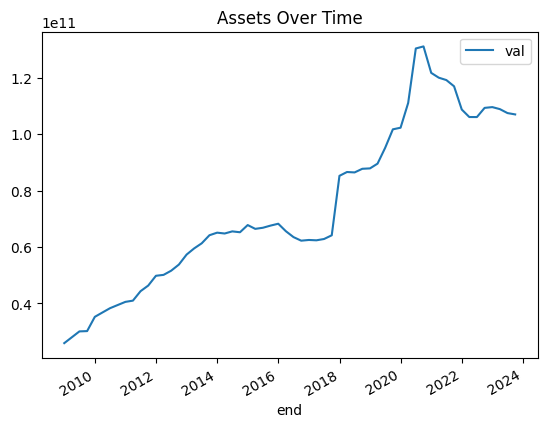

In [11]:
assets_data.plot(x='end', y='val', title='Assets Over Time')
plt.show()

## Analysis of LiabilitiesCurrent

In [12]:
# Filter out the Liabilities data
liabilities = raw_data[raw_data['Metric'] == 'LiabilitiesCurrent']

In [13]:
liabilities_data = prepare_and_sort_financial_data(raw_data, 'LiabilitiesCurrent')

In [14]:
liabilities_data.head(5)

,EntityName,CIK,Metric,end,val,year,quarter
118,THE BOEING COMPANY,12927,LiabilitiesCurrent,2008-12-31,30773000000,2008,Q4
119,THE BOEING COMPANY,12927,LiabilitiesCurrent,2009-06-30,31272000000,2009,Q2
120,THE BOEING COMPANY,12927,LiabilitiesCurrent,2009-09-30,32049000000,2009,Q3
125,THE BOEING COMPANY,12927,LiabilitiesCurrent,2009-12-31,32883000000,2009,Q4
126,THE BOEING COMPANY,12927,LiabilitiesCurrent,2010-03-31,33484000000,2010,Q1


           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-06-28 15:51:51.864406784  6.195198e+10
min    12927.0            2008-12-31 00:00:00  3.077300e+10
25%    12927.0            2012-11-15 00:00:00  4.391700e+10
50%    12927.0            2016-06-30 00:00:00  5.320400e+10
75%    12927.0            2020-02-14 12:00:00  8.528500e+10
max    12927.0            2023-09-30 00:00:00  9.731200e+10
std        0.0                            NaN  2.234544e+10


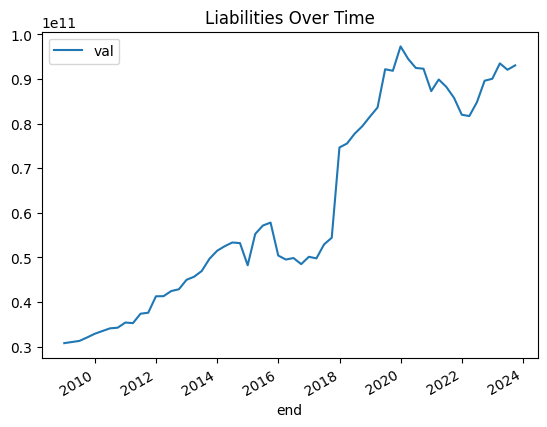

In [15]:
print(liabilities_data.describe())
liabilities_data.plot(x='end', y='val', title='Liabilities Over Time')
plt.show()


# Merge the Data

In [16]:
df_merged = pd.merge(assets_data, liabilities_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_assets', '_liabilities'))

In [17]:
df_merged = pd.merge(df_merged, liabilities_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer')
                     

In [18]:
df_merged.rename(columns={'val_assets': 'CurrentAssets', 
                          'val_liabilities': 'CurrentLiabilities'}, inplace=True)

In [19]:
df_merged.head(5)

,EntityName,CIK,Metric_assets,end,CurrentAssets,year,quarter,Metric_liabilities,CurrentLiabilities,Metric,val
0,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,2008,Q4,LiabilitiesCurrent,30773000000,LiabilitiesCurrent,30773000000
1,THE BOEING COMPANY,12927,AssetsCurrent,2009-06-30,30120000000,2009,Q2,LiabilitiesCurrent,31272000000,LiabilitiesCurrent,31272000000
2,THE BOEING COMPANY,12927,AssetsCurrent,2009-09-30,30227000000,2009,Q3,LiabilitiesCurrent,32049000000,LiabilitiesCurrent,32049000000
3,THE BOEING COMPANY,12927,AssetsCurrent,2009-12-31,35275000000,2009,Q4,LiabilitiesCurrent,32883000000,LiabilitiesCurrent,32883000000
4,THE BOEING COMPANY,12927,AssetsCurrent,2010-03-31,36798000000,2010,Q1,LiabilitiesCurrent,33484000000,LiabilitiesCurrent,33484000000


# Calculation

**Liquidity:**
    
    - `AssetsCurrent` (Current Assets)
    - `LiabilitiesCurrent` (Current Liabilities)
    - **Calculation:** Current Ratio = Current Assets / Current Liabilities to evaluate short-term financial stability.

In [20]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [21]:
# Convert financial values from cents to millions for readability
df_final['CurrentAssets'] /= 1000000
df_final['CurrentLiabilities'] /= 1000000

In [22]:
# Calculate the Current Ratio
# Ensure that division by zero is handled by replacing zero denominators with NaN
df_final['CurrentRatio'] = df_final.apply(lambda row: row['CurrentAssets'] / row['CurrentLiabilities'] 
                                          if row['CurrentLiabilities'] > 0 
                                          else None, axis=1)

In [23]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'CurrentAssets', 'CurrentLiabilities', 'CurrentRatio', 'year', 'quarter']]


In [24]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE', 'year': 'Year', 'quarter': 'Quarter'}, inplace=True)

In [25]:
df_copy.head(5)

,ENTITY,CIK,DATE,CurrentAssets,CurrentLiabilities,CurrentRatio,Year,Quarter
0,THE BOEING COMPANY,12927,2008-12-31,25964.0,30773.0,0.843727,2008,Q4
1,THE BOEING COMPANY,12927,2009-06-30,30120.0,31272.0,0.963162,2009,Q2
2,THE BOEING COMPANY,12927,2009-09-30,30227.0,32049.0,0.943150,2009,Q3
3,THE BOEING COMPANY,12927,2009-12-31,35275.0,32883.0,1.072743,2009,Q4
4,THE BOEING COMPANY,12927,2010-03-31,36798.0,33484.0,1.098973,2010,Q1


# Visualization

In [26]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px


app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Financial Dashboard: THE BOEING COMPANY", style={'text-align': 'center'}),

    # Dropdown for metric selection
    html.Div([
        html.Label("Select Financial Metric:"),
        dcc.Dropdown(
            id='metric-select-dropdown',
            options=[
                {'label': 'Current Assets', 'value': 'CurrentAssets'},
                {'label': 'Current Liabilities', 'value': 'CurrentLiabilities'},
                {'label': 'Current Ratio', 'value': 'CurrentRatio'}
            ],
            value='CurrentAssets'  # Default value
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Date Range Picker
    html.Div([
        html.Label("Select Date Range:"),
        dcc.DatePickerRange(
            id='date-range-picker',
            min_date_allowed=df_copy['DATE'].min(),
            max_date_allowed=df_copy['DATE'].max(),
            start_date=df_copy['DATE'].min(),
            end_date=df_copy['DATE'].max()
        )
    ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),

    # Time Series Chart
    dcc.Graph(id='time-series-chart'),

    # Additional Charts
    html.Div([
        dcc.Graph(id='assets-vs-liabilities-chart'),
        dcc.Graph(id='current-ratio-chart'),
    ], style={'columnCount': 2})
])

# Callback to update time series chart based on selections
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('metric-select-dropdown', 'value'),
     Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_time_series(selected_metric, start_date, end_date):
    filtered_df = df_copy[(df_copy['DATE'] >= start_date) & (df_copy['DATE'] <= end_date)]
    fig = px.line(filtered_df, x='DATE', y=selected_metric, title=f'{selected_metric} Over Time')
    return fig

# Callback for Assets vs Liabilities Chart
@app.callback(
    Output('assets-vs-liabilities-chart', 'figure'),
    [Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_assets_liabilities_chart(start_date, end_date):
    filtered_df = df_copy[(df_copy['DATE'] >= start_date) & (df_copy['DATE'] <= end_date)]
    fig = px.scatter(filtered_df, x='CurrentAssets', y='CurrentLiabilities', color='Year',
                     title='Current Assets vs Current Liabilities')
    return fig

# Callback for Current Ratio Chart
@app.callback(
    Output('current-ratio-chart', 'figure'),
    [Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_current_ratio_chart(start_date, end_date):
    filtered_df = df_copy[(df_copy['DATE'] >= start_date) & (df_copy['DATE'] <= end_date)]
    fig = px.bar(filtered_df, x='DATE', y='CurrentRatio', color='Quarter',
                 title='Current Ratio by Quarter')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

: 